<a href="https://colab.research.google.com/github/muskan123-sketch/Avocado-Prices-Using-Facebook-Prophet/blob/main/Avocado_Prices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREDICTING AVOCADO PRICES USING FACEBOOK PROPHET 




# STEP #0: PROBLEM STATEMENT

- Data represents weekly 2018 retail scan data for National retail volume (units) and price. 
- Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
- The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
- The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Columns here represent:

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold



# STEP #1: IMPORTING DATA



- Prophet is open source software released by Facebook’s Core Data Science team.

- Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. 

- Prophet works best with time series that have strong seasonal effects and several seasons of historical data. 



In [3]:
# importing libraries
!pip install fbprophet 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import random
import seaborn as sns
from fbprophet import Prophet


In [4]:
# dataframes creation for both training and testing datasets 
avocado_df = pd.read_csv('avocado.csv')


# STEP #2: EXPLORING THE DATASET  

In [5]:
# Let's view the head of the training dataset
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
# Let's view the last elements in the training dataset
avocado_df.tail(20)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18229,4,2018-02-25,1.49,301985.61,34200.18,49139.34,85.58,218560.51,99989.62,118314.77,256.12,organic,2018,West
18230,5,2018-02-18,1.64,224798.60,30149.00,38800.64,123.13,155725.83,120428.13,35257.73,39.97,organic,2018,West
18231,6,2018-02-11,1.47,275248.53,24732.55,61713.53,243.00,188559.45,88497.05,99810.80,251.60,organic,2018,West
18232,7,2018-02-04,1.41,283378.47,22474.66,55360.49,133.41,205409.91,70232.59,134666.91,510.41,organic,2018,West
18233,8,2018-01-28,1.80,185974.53,22918.40,33051.14,93.52,129911.47,77822.23,51986.86,102.38,organic,2018,West
18234,9,2018-01-21,1.83,189317.99,27049.44,33561.32,439.47,128267.76,76091.99,51947.50,228.27,organic,2018,West
18235,10,2018-01-14,1.82,207999.67,33869.12,47435.14,433.52,126261.89,89115.78,37133.99,12.12,organic,2018,West
18236,11,2018-01-07,1.48,297190.60,34734.97,62967.74,157.77,199330.12,103761.55,95544.39,24.18,organic,2018,West
18237,0,2018-03-25,1.62,15303.40,2325.30,2171.66,0.00,10806.44,10569.80,236.64,0.00,organic,2018,WestTexNewMexico
18238,1,2018-03-18,1.56,15896.38,2055.35,1499.55,0.00,12341.48,12114.81,226.67,0.00,organic,2018,WestTexNewMexico


In [7]:
avocado_df = avocado_df.sort_values('Date')#to have the chronological order

In [8]:
avocado_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


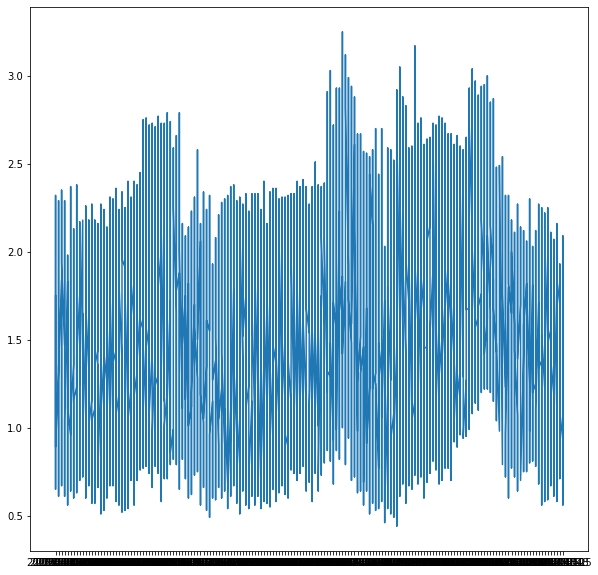

In [9]:
plt.figure(figsize=(10,10))#for clear visualization
plt.plot(avocado_df['Date'], avocado_df['AveragePrice'])


In [10]:
avocado_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text major ticklabel objects>)

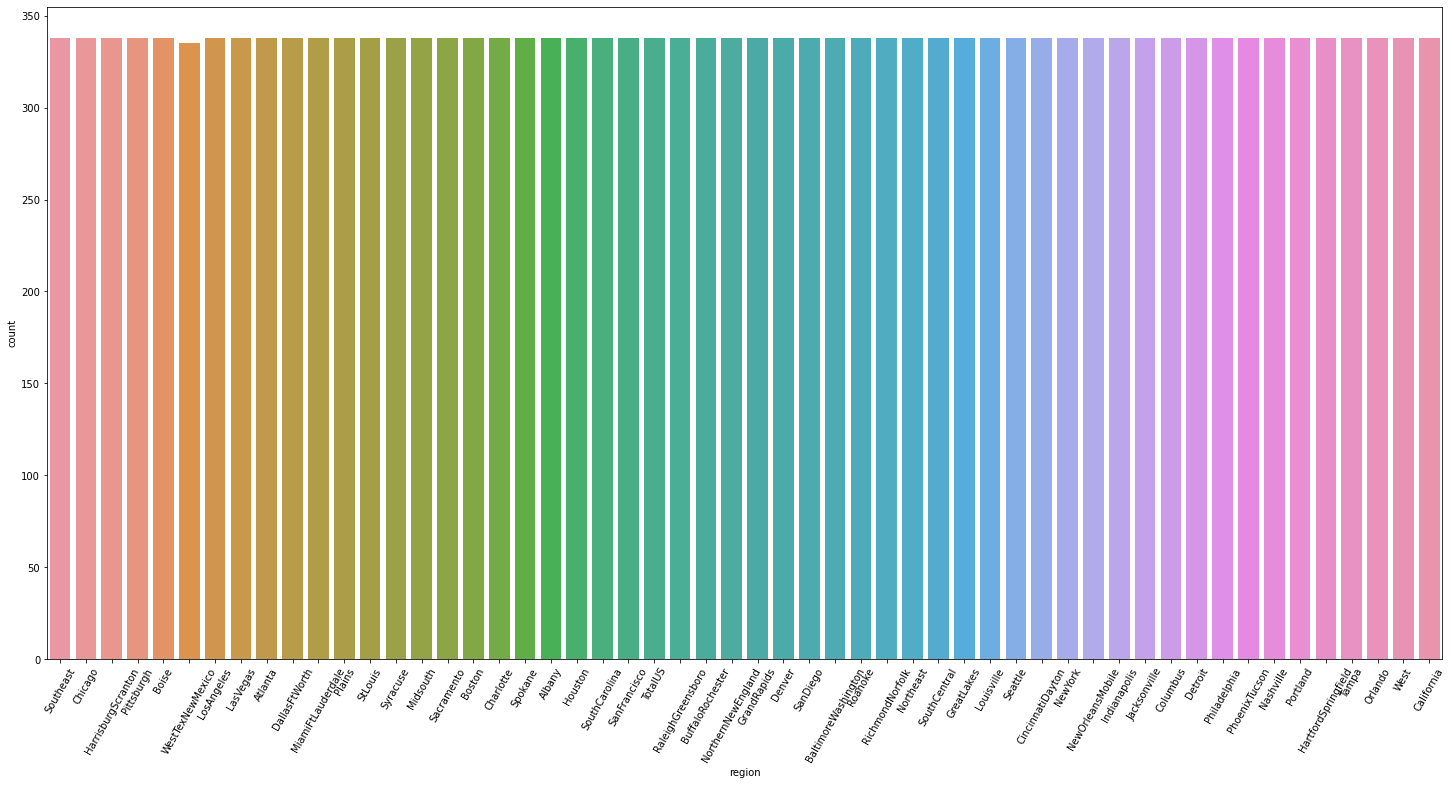

In [11]:
# Bar Chart to indicate the number of regions 
plt.figure(figsize=[25,12])
sns.countplot(x = 'region', data = avocado_df)
plt.xticks(rotation = 60)#so that we can we view the regions clearly


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

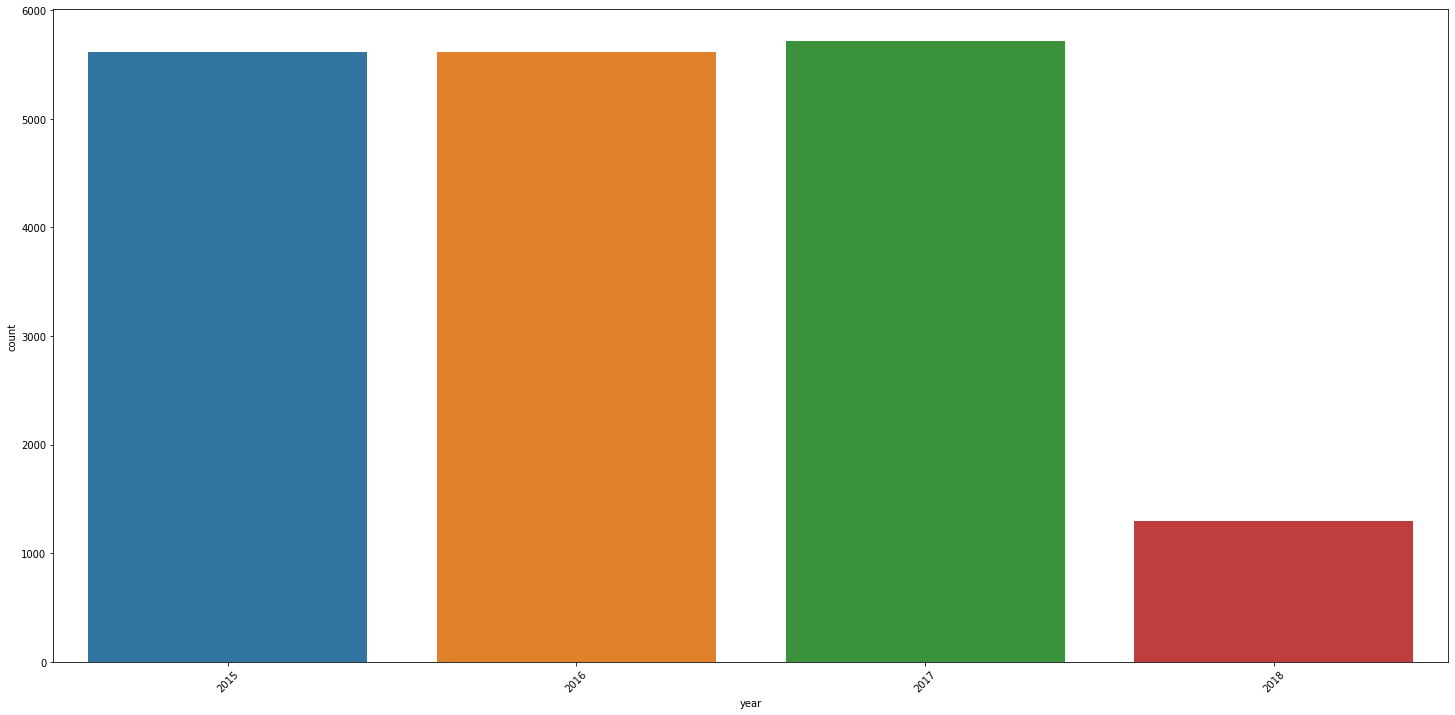

In [12]:
# Bar Chart to indicate the year
plt.figure(figsize=[25,12])
sns.countplot(x = 'year', data = avocado_df)
plt.xticks(rotation = 45)


In [13]:
avocado_prophet_df = avocado_df[['Date', 'AveragePrice']] 


In [14]:
avocado_prophet_df

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


# STEP 3: MAKE PREDICTIONS

In [15]:
avocado_prophet_df = avocado_prophet_df.rename(columns={'Date':'ds', 'AveragePrice':'y'})


In [16]:
avocado_prophet_df

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [17]:
m=Prophet()
m.fit(avocado_prophet_df)


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [18]:
# Forcasting into the future
future=m.make_future_dataframe(periods=730)#getting a suitable dataframe that extends into the future a specified number of days using the helper method Prophet.make_future_dataframe. 
forecast = m.predict(future)

In [19]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.498818,0.880672,1.835237,1.498818,1.498818,-0.113604,-0.113604,-0.113604,-0.113604,-0.113604,-0.113604,0.0,0.0,0.0,1.385214
1,2015-01-11,1.493637,0.921811,1.834799,1.493637,1.493637,-0.105192,-0.105192,-0.105192,-0.105192,-0.105192,-0.105192,0.0,0.0,0.0,1.388445
2,2015-01-18,1.488455,0.883861,1.887926,1.488455,1.488455,-0.104862,-0.104862,-0.104862,-0.104862,-0.104862,-0.104862,0.0,0.0,0.0,1.383592
3,2015-01-25,1.483273,0.876534,1.832721,1.483273,1.483273,-0.123788,-0.123788,-0.123788,-0.123788,-0.123788,-0.123788,0.0,0.0,0.0,1.359485
4,2015-02-01,1.478091,0.852462,1.803558,1.478091,1.478091,-0.152113,-0.152113,-0.152113,-0.152113,-0.152113,-0.152113,0.0,0.0,0.0,1.325978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,2020-03-20,0.894732,0.049573,1.575900,0.348392,1.452861,-0.086574,-0.086574,-0.086574,-0.086574,-0.086574,-0.086574,0.0,0.0,0.0,0.808158
895,2020-03-21,0.894001,0.076978,1.569844,0.346360,1.452999,-0.084965,-0.084965,-0.084965,-0.084965,-0.084965,-0.084965,0.0,0.0,0.0,0.809036
896,2020-03-22,0.893269,0.089833,1.545398,0.344629,1.453137,-0.083078,-0.083078,-0.083078,-0.083078,-0.083078,-0.083078,0.0,0.0,0.0,0.810191
897,2020-03-23,0.892538,0.119088,1.633650,0.342310,1.453276,-0.080932,-0.080932,-0.080932,-0.080932,-0.080932,-0.080932,0.0,0.0,0.0,0.811605


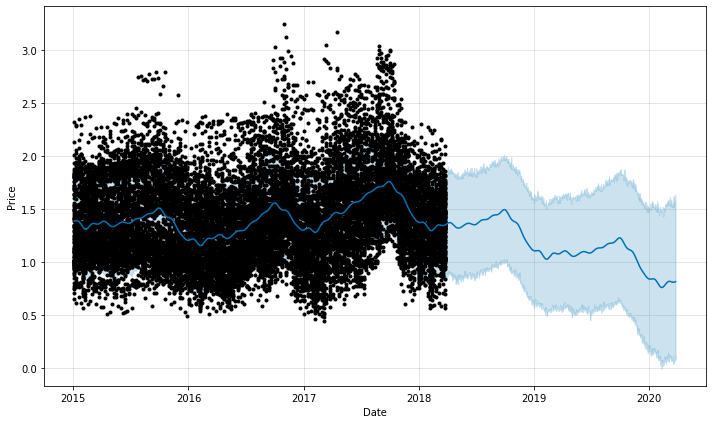

In [20]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

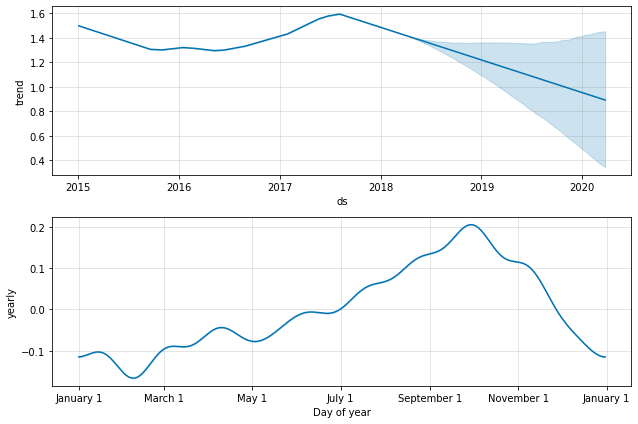

In [21]:
figure3 = m.plot_components(forecast)

# PART 2

In [34]:
# dataframes creation for both training and testing datasets 
avocado_df = pd.read_csv('avocado.csv')


In [36]:
avocado_df_sample=avocado_df[avocado_df['region']=='West']

In [38]:
avocado_df_sample

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2704,0,2015-12-27,0.83,5291979.63,2038443.68,1717599.45,125254.82,1410681.68,838267.79,567269.76,5144.13,conventional,2015,West
2705,1,2015-12-20,0.88,4737649.03,2017331.24,1314711.00,130849.60,1274757.19,843691.13,417746.45,13319.61,conventional,2015,West
2706,2,2015-12-13,0.85,4899439.92,1798995.46,1596329.01,134101.62,1370013.83,851506.76,517936.19,570.88,conventional,2015,West
2707,3,2015-12-06,0.75,6202513.84,2097720.52,2051392.83,107568.34,1945832.15,1360760.83,582846.33,2224.99,conventional,2015,West
2708,4,2015-11-29,0.99,3719603.21,1461861.54,1216811.00,104219.76,936710.91,688674.00,247318.15,718.76,conventional,2015,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18232,7,2018-02-04,1.41,283378.47,22474.66,55360.49,133.41,205409.91,70232.59,134666.91,510.41,organic,2018,West
18233,8,2018-01-28,1.80,185974.53,22918.40,33051.14,93.52,129911.47,77822.23,51986.86,102.38,organic,2018,West
18234,9,2018-01-21,1.83,189317.99,27049.44,33561.32,439.47,128267.76,76091.99,51947.50,228.27,organic,2018,West
18235,10,2018-01-14,1.82,207999.67,33869.12,47435.14,433.52,126261.89,89115.78,37133.99,12.12,organic,2018,West


In [39]:
avocado_df_sample = avocado_df_sample.sort_values("Date")

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


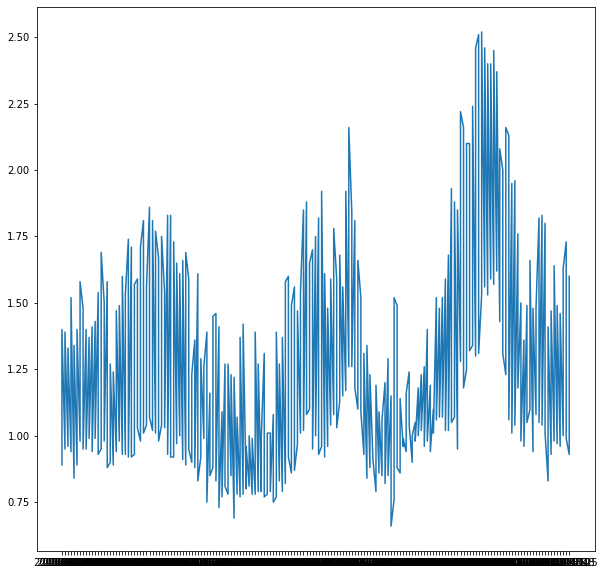

In [41]:
plt.figure(figsize=(10,10))
plt.plot(avocado_df_sample['Date'],avocado_df_sample['AveragePrice'])

In [42]:
avocado_df_sample=avocado_df_sample[['Date','AveragePrice']]

In [43]:
avocado_df_sample

,Date,AveragePrice
2755,2015-01-04,0.89
11881,2015-01-04,1.40
2754,2015-01-11,0.95
11880,2015-01-11,1.39
2753,2015-01-18,0.96
...,...,...
18227,2018-03-11,1.63
18226,2018-03-18,1.73
9103,2018-03-18,0.99
9102,2018-03-25,0.93


In [46]:

avocado_df_sample=avocado_df_sample.rename(columns={'Date':'ds','AveragePrice':'y'})

In [47]:
m=Prophet()
m.fit(avocado_df_sample)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [48]:
future=m.make_future_dataframe(periods=365)
forecast=m.predict(future)

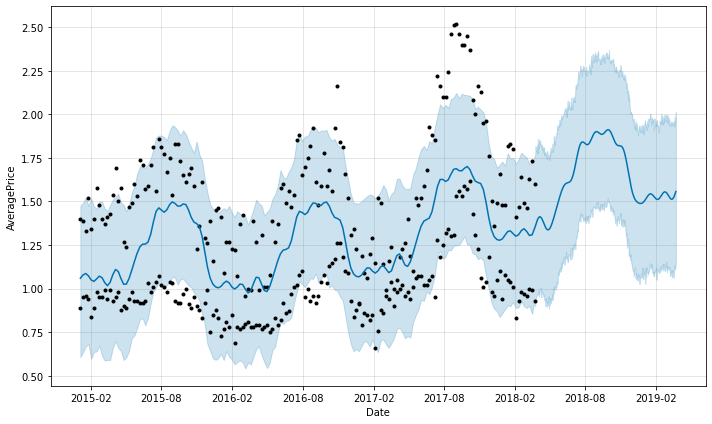

In [53]:
figure = m.plot(forecast, xlabel='Date', ylabel='AveragePrice')

**Trend is found increasing according to the future forcast **

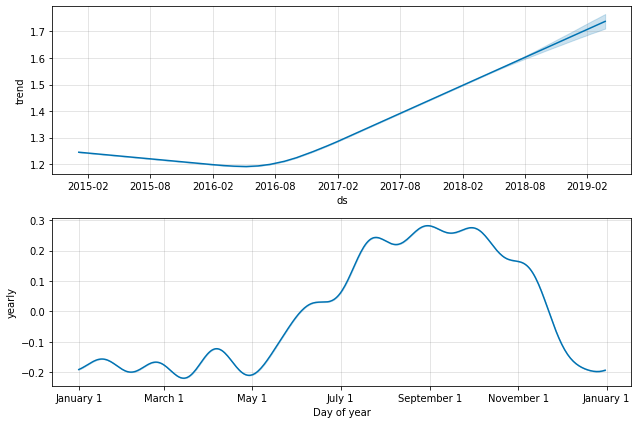

In [55]:
figure2 = m.plot_components(forecast)